### 0. Importar librerías

In [1]:
import pandas as pd
import numpy as np

# Se define la semilla para que cuando se vuelva a ejecutar el split train-test
# los datos que contiene cada conjunto sean los mismos
semilla = 1234

---

# 1. Cargar el dataset

In [2]:
# Ruta del fichero del dataset sin filtrar
path = '../datos/datos.csv'

# Cargar el dataset
datos = pd.read_csv(path)

# Al ser un dataset pequeño se muestra completo
datos

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
119,4.093525,3.037288,3.97,5.35,2
120,4.730000,3.040000,7.04,14.44,2
121,4.010000,4.110000,6.65,17.37,2
122,3.200000,2.360000,6.70,10.57,2


In [3]:
# Contar el número de instancias de cada grupo
datos['Grupo'].value_counts()

1    62
0    48
2    14
Name: Grupo, dtype: int64

## Preparar conjuntos de entrenamiento (60%) y test (40%)

In [4]:
# Se separa la variable a predecir (Grupo)
X = datos.drop('Grupo', axis=1)
y = datos['Grupo']

In [5]:
# Importar librería de scikit-learn para separar los datos
from sklearn.model_selection import train_test_split

# Separar datos en conjunto de entrenamiento (60%) y test (40%) de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=semilla)

In [6]:
# Visualizar la dimensión de los datos separados
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (74, 4)
Training Labels Shape: (74,)
Testing Features Shape: (50, 4)
Testing Labels Shape: (50,)


In [7]:
# Distribución de los grupos en el conjunto de entrenamiento
y_train.value_counts()

1    37
0    29
2     8
Name: Grupo, dtype: int64

In [8]:
# Valores normalizados
y_train.value_counts(normalize=True)

1    0.500000
0    0.391892
2    0.108108
Name: Grupo, dtype: float64

In [9]:
# Distribución de los grupos en el conjunto de test
y_test.value_counts()

1    25
0    19
2     6
Name: Grupo, dtype: int64

In [10]:
# Valores normalizados
y_test.value_counts(normalize=True)

1    0.50
0    0.38
2    0.12
Name: Grupo, dtype: float64

### Visualizar distribución de cada conjunto (entrenamiento y test)

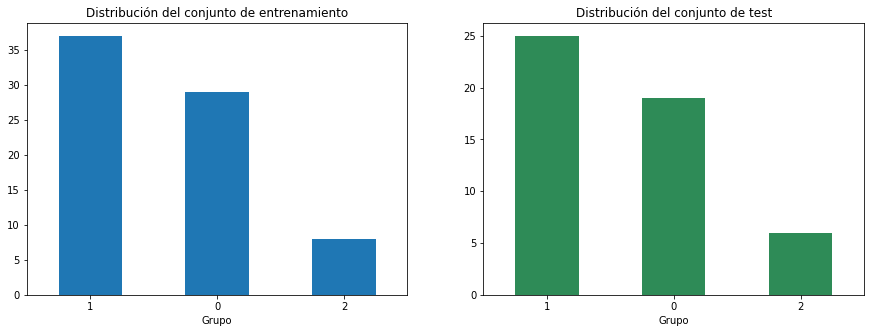

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

#fig.suptitle("Distribución de los grupos en los conjuntos de entrenamiento y test")

# Representación del conjunto de entrenamiento
plt.subplot(121)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución del conjunto de entrenamiento')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

# Representación del conjunto de test
plt.subplot(122)
y_test.value_counts().plot(kind='bar', color='seagreen')
plt.title('Distribución del conjunto de test')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

plt.show()

---

# 2. Crear el modelo

In [12]:
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo
modelo_nb = GaussianNB()

In [13]:
# Se entrena el modelo
modelo_nb.fit(X_train, y_train)

GaussianNB()

In [14]:
# Se visualiza la exactitud (accuracy) del entrenamiento para compararlo con el que se obtenga en la evaluación
print(modelo_nb.score(X_train, y_train))

0.8378378378378378


---

# 3. Evaluar el modelo

In [15]:
# Se lleva a cabo la predicción para evaluar el modelo
y_pred = modelo_nb.predict(X_test)

In [16]:
# Visualización de las predicciones
print(y_pred)

[0 1 2 0 1 1 0 0 1 1 2 0 1 0 1 2 1 1 0 1 1 0 1 1 1 1 1 1 2 0 0 1 0 1 0 1 0
 0 0 1 2 0 1 0 2 1 1 1 1 1]


## Matriz de confusión

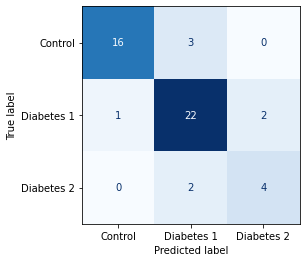

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
# Filas: valores reales
# Columnas: predicción

clases = ['Control', 'Diabetes 1', 'Diabetes 2']

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)

disp.plot(cmap='Blues', colorbar=False)
plt.show()

## Classification report

In [18]:
clases = ['Control', 'Diabetes 1', 'Diabetes 2']

print(classification_report(y_test,
                            y_pred,
                            target_names=clases,
                            digits=4,
                            zero_division=0))

# El parámetro zero_division no muestra warnings cuando se vaya a realizar una división por 0 al calcular alguna métrica

              precision    recall  f1-score   support

     Control     0.9412    0.8421    0.8889        19
  Diabetes 1     0.8148    0.8800    0.8462        25
  Diabetes 2     0.6667    0.6667    0.6667         6

    accuracy                         0.8400        50
   macro avg     0.8076    0.7963    0.8006        50
weighted avg     0.8451    0.8400    0.8409        50



Se calcula la __especificidad__ a partir de la clase _multilabel_confusion_matrix_. Se van a obtener también el resto de métricas con las obtenidas en el _classification report_ para comprobar que son correctas.

Código basado en la documentación de scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-confusion-matrix

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Se obtiene la matriz de confusión de cada clase
cm_multi = multilabel_confusion_matrix(y_test, y_pred)

# Se obtienen los valores de TN, TP, FN y FP de cada clase
tn = cm_multi[:, 0, 0]
tp = cm_multi[:, 1, 1]
fn = cm_multi[:, 1, 0]
fp = cm_multi[:, 0, 1]

# Se calculan las métricas (array de dimensión 3 con la métrica para cada clase)
accuracy    = accuracy_score(y_test, y_pred)
precision   = tp / (tp + fp)
recall      = tp / (tp + fn)
specificity = tn / (tn + fp)
f1          = (2 * precision * recall) / (precision + recall)

# Visualizar la exactitud del modelo
print("----------------------")
print("Exactitud: \t{:.4f}".format(accuracy))
print("----------------------")
print("")

# Visualizar la métrica precision para cada clase y la global (macro avg)
print("----------------------")
print("      Precisión       ")
print("----------------------")
print("Control: \t{:.4f}".format(precision[0]))
print("Diabetes 1: \t{:.4f}".format(precision[1]))
print("Diabetes 2: \t{:.4f}".format(precision[2]))
print("MACRO AVG: \t{:.4f}".format(precision.mean()))
print("")

# Visualizar la sensibilidad para cada clase y la global (macro avg)
print("----------------------")
print("     Sensibilidad     ")
print("----------------------")
print("Control: \t{:.4f}".format(recall[0]))
print("Diabetes 1: \t{:.4f}".format(recall[1]))
print("Diabetes 2: \t{:.4f}".format(recall[2]))
print("MACRO AVG: \t{:.4f}".format(recall.mean()))
print("")

# Visualizar la especificidad para cada clase y la global (macro avg)
print("----------------------")
print("    Especificidad     ")
print("----------------------")
print("Control: \t{:.4f}".format(specificity[0]))
print("Diabetes 1: \t{:.4f}".format(specificity[1]))
print("Diabetes 2: \t{:.4f}".format(specificity[2]))
print("MACRO AVG: \t{:.4f}".format(specificity.mean()))
print("")

# Visualizar la mátrica F1 para cada clase y la global (macro avg)
print("----------------------")
print("       F1-score       ")
print("----------------------")
print("Control: \t{:.4f}".format(f1[0]))
print("Diabetes 1: \t{:.4f}".format(f1[1]))
print("Diabetes 2: \t{:.4f}".format(f1[2]))
print("MACRO AVG: \t{:.4f}".format(f1.mean()))
print("")

----------------------
Exactitud: 	0.8400
----------------------

----------------------
      Precisión       
----------------------
Control: 	0.9412
Diabetes 1: 	0.8148
Diabetes 2: 	0.6667
MACRO AVG: 	0.8076

----------------------
     Sensibilidad     
----------------------
Control: 	0.8421
Diabetes 1: 	0.8800
Diabetes 2: 	0.6667
MACRO AVG: 	0.7963

----------------------
    Especificidad     
----------------------
Control: 	0.9677
Diabetes 1: 	0.8000
Diabetes 2: 	0.9545
MACRO AVG: 	0.9074

----------------------
       F1-score       
----------------------
Control: 	0.8889
Diabetes 1: 	0.8462
Diabetes 2: 	0.6667
MACRO AVG: 	0.8006

